>Jacob Lustig-Yaeger  

>January 20+, 2016

# Fraunhofer line strengths and the curve of growth ("Marcel Minnaert")  

# 3.1 The Planck law  
For electromagnetic radiation the counterparts to the material Saha and Boltzmann distributions are the Planck law and its relatives (the Wien displacement law and the Stefan-Boltzmann law). They also hold strictly in TE ("Thermodynamical Equilibrium") and reasonably well in stellar photospheres. The Planck function specifies the radiation intensity emitted by a gas or a body in TE (a "black body") as:  
$$ B_{\lambda}(T) = \frac{2 h c^2}{\lambda^5} \frac{1}{e^{h c / \lambda k T} - 1}$$
with $h$ the Planck constant, $c$ the speed of light, $k$ the Boltzmann constant, $\lambda$ the wavelength and $T$ the temperature. The dimension of $ B_{\lambda}$ in the cgs units used here is erg cm$^{-2}$ s$^{-1}$ cm$^{-1}$ steradian$^{-1}$, which is the dimension of radiative intensity in a specific direction.  

**Write a function ``planck(temp,wav)`` in cgs units.**

In [19]:
# Import some fundamental python packages
%matplotlib inline
import numpy as np
import scipy as sp
import pdb
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=25, usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 25.0

# Define some physical constants in CGS
h = 6.62607e-27       # Planck constant (erg s)
c = 2.998e10          # Speed of light (cm / s)
k = 1.3807e-16        # Boltzmann constant (erg / K)

# Define function for color plots
def scalarmap(v,cmap='plasma'):
    import matplotlib.cm as cmx
    import matplotlib.colors as colors
    cm = plt.get_cmap(cmap)
    cNorm  = colors.Normalize(vmin=np.min(v), vmax=np.max(v))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    colors = scalarMap.to_rgba(v)
    return colors,scalarMap,cNorm

# Define planck function
def planck(temp, wav):
    return (2. * h * c**2) / (wav**5) / (np.exp(h * c / (wav * k * temp)) - 1.0)

In [95]:
# Check that Planck function works correctly
print planck(5000., 5000e-8)

1.2108624655e+14


**Use it to plot Planck curves against wavelength in the visble part of the spectrum for different stellar-like temperatures:**

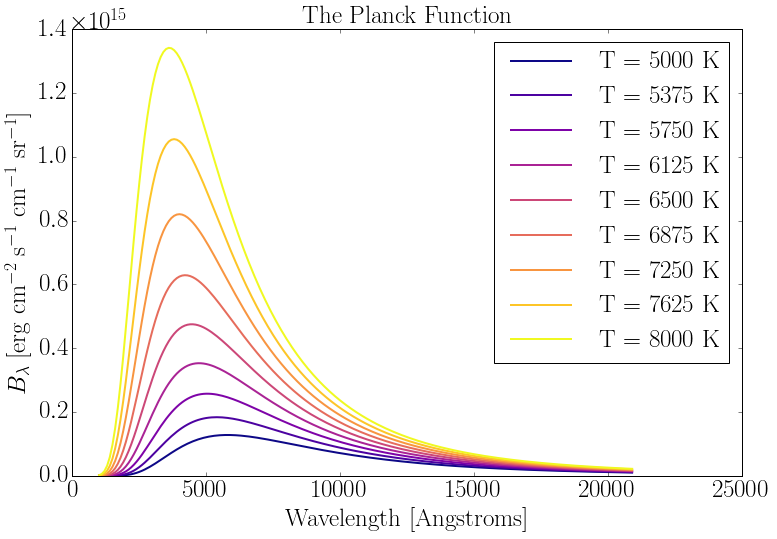

In [21]:
wavelength = np.arange(1000,21000,100)           # (Anstroms)
temperatures = np.linspace(5000,8000,9)         # (K)

colors,smap,cNorm = scalarmap(temperatures)

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
for i in range(len(temperatures)):
    B = np.zeros_like(wavelength)
    for j in range(len(wavelength)):
        B[j] = planck(temperatures[i], wavelength[j] * 1e-8)
    ax0.plot(wavelength,B,c=colors[i], lw=2.0, label=r'T = '+str(int(temperatures[i]))+' K')      
ax0.legend()
ax0.set_xlabel(r"Wavelength [Angstroms]")
ax0.set_ylabel(r"$B_{\lambda}$ [erg cm$^{-2}$ s$^{-1}$ cm$^{-1}$ sr$^{-1}$]")
ax0.set_title("The Planck Function")
plt.show()

**Study the Planck function properties. $B_{\lambda}(T)$ increases at any wavelength with the temperature, but much faster (exponentially, Wien regime) at short wavelengths then at long wavelengths (linearly, Rayleigh-Jeans regime). The peak divides the two regimes and shifts to shorter wavelengths for higher temperature (Wien displacement law). The spectrum-integrated Planck function (area under the curve in this linear plot) increases steeply with temperature (Stefan-Boltzmann law).**  

**Add ylog to the plot statement to make the y-axis logarithmic. Inspect the result. Then make the
x-axis also logarithmic and inspect the result.**

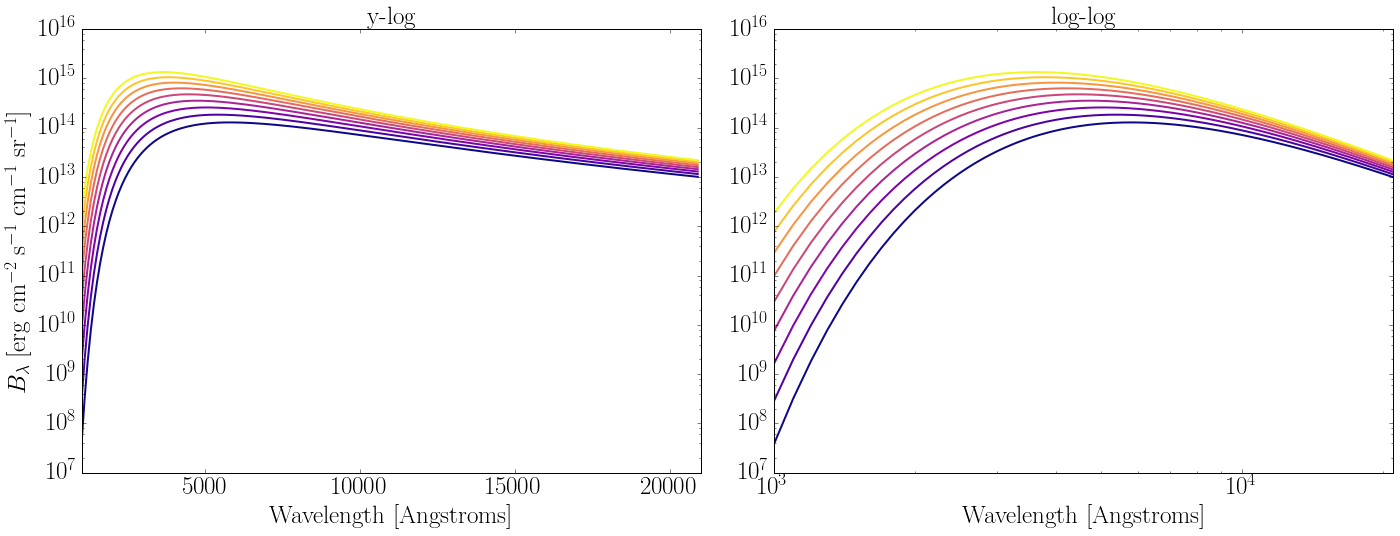

In [22]:
fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(1,2) 
ax0 = plt.subplot(gs[0])
for i in range(len(temperatures)):
    B = np.zeros_like(wavelength)
    for j in range(len(wavelength)):
        B[j] = planck(temperatures[i], wavelength[j] * 1e-8)
    ax0.plot(wavelength,B,c=colors[i], lw=2.0, label=r'T = '+str(int(temperatures[i]))+' K')      
ax0.set_xlabel(r"Wavelength [Angstroms]")
ax0.set_ylabel(r"$B_{\lambda}$ [erg cm$^{-2}$ s$^{-1}$ cm$^{-1}$ sr$^{-1}$]")
ax0.semilogy()
ax0.set_xlim([1000,21000])
ax0.set_title('y-log')

ax1 = plt.subplot(gs[1])
for i in range(len(temperatures)):
    B = np.zeros_like(wavelength)
    for j in range(len(wavelength)):
        B[j] = planck(temperatures[i], wavelength[j] * 1e-8)
    ax1.plot(wavelength,B,c=colors[i], lw=2.0, label=r'T = '+str(int(temperatures[i]))+' K')      
ax1.set_xlabel(r"Wavelength [Angstroms]")
ax1.loglog()
ax1.set_title('log-log')
ax1.set_xlim([1000,21000])

fig.tight_layout()
plt.show()

**Explain the slopes of the righthand part.**  

> The righthand or long wavelength region of the plank curve has a decreasing powerlaw slope because the $\lambda^{-5}$ dependence dominates the exponential. Taylor expanding the exponential gives the classical Rayleigh-Jeans limit, where $B \sim \lambda^{-4}$. Thus all the righthand curves all have slopes of $-4$. 

# 3.2 Radiation through an isothermal layer  
We need another quantity next to the radiation produced by a gas of temperature $T$ , namely the amount of absorption. A beam of radiation with intensity $I(0)$ passes through a layer in which it is attenuated. The weakened intensity that emerges on the right is given by  

$$ I = I(0)e^{-\tau} $$

in which the optical depth, $\tau$, specifies the attenuation by absorption in the layer. The next step is to add the radiation that originates within the layer itself. This local contribution at a location x within the layer is subsequently attenuated by the remainder of the layer, so that its addition to the emergent beam is given by:  

$$ \Delta I_{\lambda} = B_{\lambda}[T(x)]e^{-(\tau - \tau(x))} d \tau(x)$$  

Then the total emergent intensity is:  

$$ I_{\lambda} = I_{\lambda}(0)e^{-\tau} + \int^{\tau}_{0} B_{\lambda}[T(x)]e^{-(\tau - \tau(x))} d \tau(x) $$  

which for an isothermal layer ($T$ and therefore also $B_{\lambda}(T)$ are independent of $x$) simplifies to:  

$$ I_{\lambda} = I_{\lambda}(0)e^{-\tau} + B_{\lambda}(1 - e^{-\tau}). $$  

**Derive the previous equation from the equation preceeding it.**

> For an isothermal layer, $T = \text{const.} \ne T(x)$, and therefore $B(T) \ne B(x)$. Thus we can take $B_{\lambda}$ out of the integral:  
$$\int^{\tau}_{0} B_{\lambda}[T(x)]e^{-(\tau - \tau(x))} d \tau(x) =  B_{\lambda}\int^{\tau}_{0}e^{-(\tau - \tau(x))} d \tau(x) = B_{\lambda} (1 - e^{-\tau})$$  
Hence, 
$$ I_{\lambda} = I_{\lambda}(0)e^{-\tau} + B_{\lambda}(1 - e^{-\tau}). $$ 

**Make plots of the emergent intensity $I_{\lambda}$ for given values $B_{\lambda}$ and $I_{\lambda}(0)$ against $\tau$:**

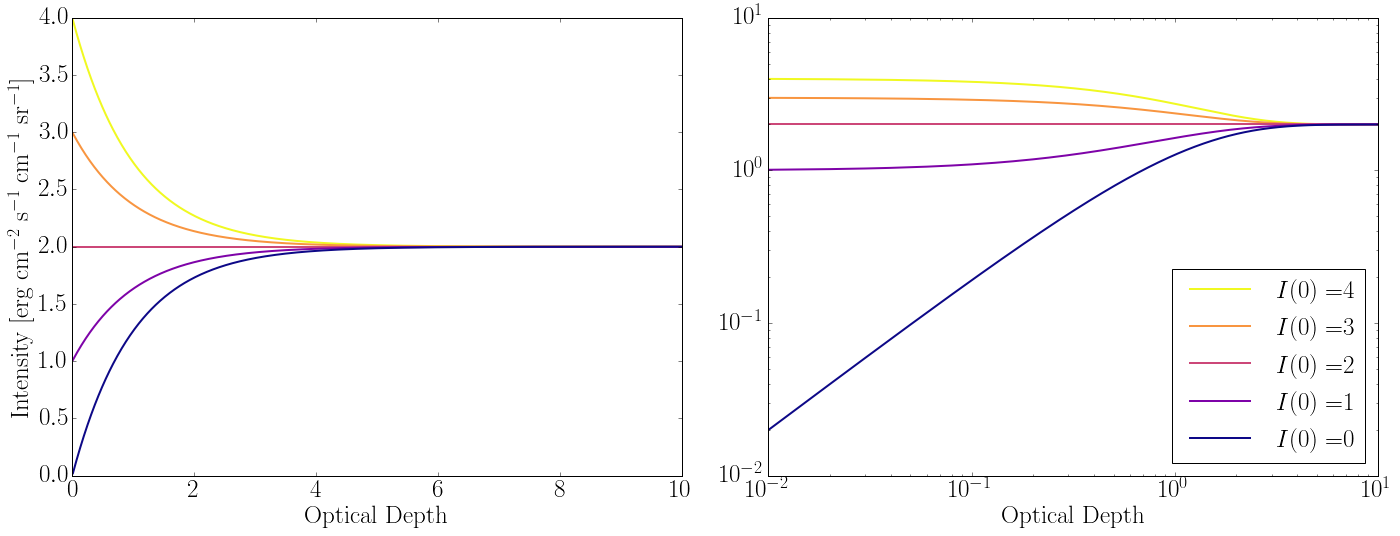

In [23]:
# Setup plot
fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(1,2) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.set_xlabel(r"Optical Depth")
ax1.set_xlabel(r"Optical Depth")
ax0.set_ylabel(r"Intensity [erg cm$^{-2}$ s$^{-1}$ cm$^{-1}$ sr$^{-1}$]")

colors,smap,cNorm = scalarmap(np.arange(5)) # Define colors

# Follow Rutten
B=2.
tau=np.arange(1000)/100.+0.01  # set array tau = 0.01-10 in steps 0.01
ilam=np.zeros_like(tau)        # declare float array of the same size
for I0 in range(4,-1,-1):      # step down from I0=4 to I0=0
    for i in range(len(tau)): 
        ilam[i]=I0 * np.exp(-tau[i]) + B*(1.-np.exp(-tau[i]))
    ax0.plot(tau,ilam, lw=2.0, label=r'$I(0) = $'+str(I0), c=colors[I0])      
    ax1.plot(tau,ilam, lw=2.0, label=r'$I(0) = $'+str(I0), c=colors[I0])
ax1.loglog()    
ax1.legend(loc=4)
fig.tight_layout()

plt.show()

**How does $I_{\lambda}$ depend on $\tau$ for $\tau << 1$ when $I_{\lambda}(0) = 0$ (see log-log to study the behavior at small $\tau$)? And when $I_{\lambda}(0) > B_{\lambda}$ ? Such a layer is called "optically thin", why?**  

> For $\tau << 1$, the total emergent intensity depends on the initial intensity becuase the opacity along the path is relatively small, so the slab is "optically thin". When there is no intensity behind the slab ($I_{\lambda}(0) = 0$), the emergent intensity grows exponentially with optical depth. When $I_{\lambda}(0) > B_{\lambda}$ the intensity decays exponentially with $\tau$. 

**A layer is called "optically thick" when it has $\tau >> 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms?**  

> When $\tau >> 1$, the total emergent intensity becomes the slab blackbody, $I_{\lambda} = B_{\lambda}$. The slab is "optically thick" enough to block any light from behind the slab, and it emits much of its intensity from an optical depth of $\tau \sim 1$. Intensity from large optical depths is completely obscured, so that the emergent intensity becomes independent of $\tau$.  

# 3.3 Spectral lines from a solar reversing layer  

We will now apply the above result for an isothermal layer to a simple model in which the Fraunhofer lines in the solar spectrum are explained by a "reversing layer".  

**Schuster-Schwarzschild model.** The basic assumptions are that the continuous radiation, without spectral lines, is emitted by the stellar surface and irradiates a separate layer with the intensity:  

$$ I_{\lambda}(0) = B_{\lambda}(T_{\text{surface}}) $$  

and that this layer sits as a shell around the star and causes attenuation and local emission only at the wavelengths of spectral lines. Thus, the shell is thought to be made up exclusively by line-causing atoms or ions. The emergent radiation at the line wavelengths is given by:  

$$ I_{\lambda} = B_{\lambda}(T_{\text{surface}}) e^{-\tau_{\lambda}} + B_{\lambda}(T_{\text{layer}})(1 - e^{-\tau_{\lambda}}).$$  

**Voigt profile.** The opaqueness $\tau$ in has an index $\lambda$ because it varies over the spectral line. When atoms absorb or emit a photon at the energy of the valence electron transition between two bound energy levels (bound electron orbits), the effect is not limited to an infinitely sharp delta function at $\lambda$, but it is a little bit spread out in wavelength or *broadened*. This broadening distribution is described by $ \tau(u) = \tau(0) V(a,u) $ where $V$ is called the Voight function and $u$ measures the wavelength separation from the center of the line for Doppler broadening $u \equiv \Delta \lambda / \Delta \lambda_D$ where  

$$ \Delta \lambda_D \equiv \frac{\lambda}{c} \sqrt{2 k T / m}. $$  

The Voigt function $V(a, u)$ is defined as:  

$$ V(a, u) \equiv \frac{1}{ \Delta \lambda_D \sqrt{\pi}} \frac{a}{\pi} \int^{+ \infty}_{- \infty} \frac{e^{-y^2}}{(u-y)^2 + a^2} dy $$  

It represents the convolution (smearing) of a Gauss profile with a Lorentz profile and therefore has a Gaussian shape close to line center ($u = 0$) due to the thermal Doppler shifts ("Doppler core") and extended Lorentzian wings due to disturbances by other particles ("damping wings"). A reasonable approximation is obtained by taking the sum rather than the convolution of the two profiles:  

$$ V(a, u) \approx \frac{1}{\Delta \lambda_D \sqrt{\pi}} \left [ e^{-u^2} + \frac{a}{\sqrt{\pi}u^2} \right ] $$  

**Start the IDL Online Help by typing ? on the command line. Inspect the description of the voigt(a,u) function. We might have programmed approximation (18), but since IDL furnishes the real thing we will use that instead.**  

> Here we will code up the full Voigt function. Note that there is a descrepancy between the above equation and the Exelis documentation. We will follow the IDL voigt function and write $V(a,u)$ as dimensionless, so that our results agree with Rutten. 

In [24]:
def integrand(y,a,u):
    return np.exp(-y**2.) / ((u - y)**2. + a**2.)
    
def voigt(a,u):
    integ = sp.integrate.quad(integrand, -np.inf, np.inf, args=(a,u))[0]
    return (a / np.pi) * integ

**Plot the Voigt function against $u$ from $u = −10$ to $u = +10$ for $a = 0.1$:**

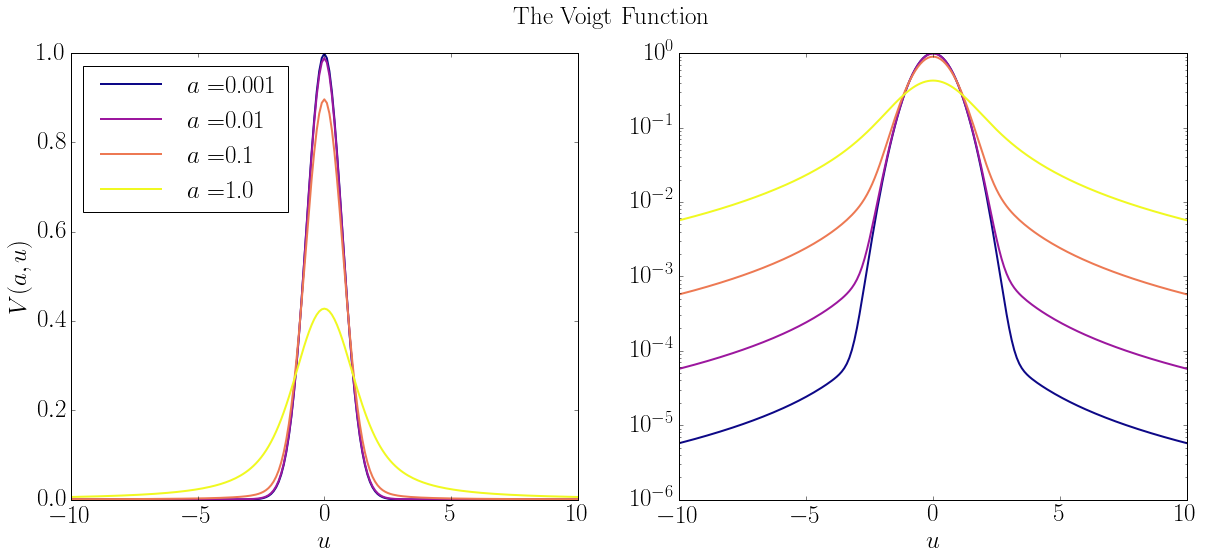

In [25]:
u = np.linspace(-10.,10.,201)    # u=-10-10 in 0.1 steps
vau=np.zeros_like(u)          
a=np.array([0.001,0.01,0.1,1.0])
colors,smap,cNorm = scalarmap(np.log10(a)) # Define colors


# Setup plot
fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(1,2) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.set_xlabel(r"$u$")
ax1.set_xlabel(r"$u$")
ax0.set_ylabel(r"$V(a,u)$")
for j in range(len(a)):
    for i in range(len(u)):
        vau[i]=voigt(a[j],np.abs(u[i]))
    ax0.plot(u,vau, lw=2.0, c=colors[j], label=r"$a =$"+str(a[j]))  
    ax1.plot(u,vau, lw=2.0, c=colors[j], label=r"$a =$"+str(a[j])) 
fig.suptitle("The Voigt Function")
ax0.legend(loc=2)
ax1.semilogy()

#fig.tight_layout()
plt.show()

**Use the approximate Voigt function to explain what you see.**  
> For reference, $$ V(a, u) \propto \left [ e^{-u^2} + \frac{a}{\sqrt{\pi}u^2} \right ] .$$  
For small separations from line center (small $u$) the Gaussian core dominates the Voigt profile $V \sim e^{-u^2}$. For large separations (large $u$), $V \sim a/u^2$ and the Lorentzian wings dominate the Voigt profile. The damping parameter $a$ dictates the amount the Lorentzian wings affect the  profile. As we see above, large $a$ allow the Lorentzian to dominate even in the line center, whereas small $a$ has a strong line core, but limited contribution from the wings. 

**Emergent line profiles.** We can now compute and plot stellar spectral line profiles. Again use the dimensionless $u$ units for the wavelength scale so that you don't have to evaluate the Doppler width $\Delta \lambda_D$.  

**Write code that computes Schuster-Schwarzschild line profiles. Take $T_{surface} = 5700$ K, $T_{layer} = 4200$ K, $a = 0.1$, $\lambda = 5000$ angstroms. These values are good choices for the solar photosphere as seen in the optical part of the spectrum. First plot a profile $I$ against $u$ for $\tau(0) = 1$. Then study the appearance of the line in the spectrum as a function of $\tau(0)$ over the range $\log \tau(0) = −2$ to $\log \tau(0) = 2$.**

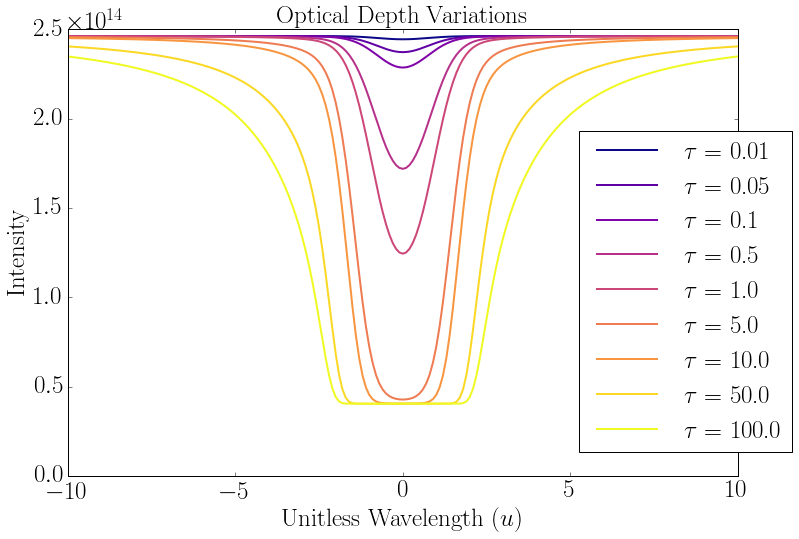

In [36]:
Ts=5700                 # solar surface temperature
Tl=4200                 # solar T-min temperature = ‘reversing layer’
a=0.1                   # damping parameter
wav=5000e-8             # wavelength in cm
# optical depth at line center:
tau0=np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100])
colors,smap,cNorm = scalarmap(np.log10(tau0)) # Define colors
u=np.linspace(-10.,10.,201)   # u = -10 to 10 in 0.1 steps
I=np.zeros_like(u)            # declare array

# Create Figure
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
# Loop over tau
for j in range(len(tau0)):
    # Loop over wavelength 
    for i in range(len(u)):
        tau=tau0[j] * voigt(a,abs(u[i]))
        I[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
    ax0.plot(u,I,c=colors[j], lw=2.0, label=r'$\tau =$ '+str(tau0[j]))      
ax0.legend(bbox_to_anchor=(1.1,0.8))
ax0.set_xlabel(r"Unitless Wavelength ($u$)")
ax0.set_ylabel(r"Intensity")
ax0.set_title("Optical Depth Variations")
plt.show()

**How do you explain the profile shapes for $\tau(0) << 1$?**  

>  The profile shapes for $\tau(0) << 1$ are dominated by the Gaussian cores, with cores growing with $\tau(0)$. 

**Why is there a low-intensity saturation limit for $\tau >> 1$?**  

> As we saw before, in the optically thick limit the absorbing/emitting medium blocks information from behind (or deeper within the star) and the intensity becomes the blackbody of the absorbing layer. In the Solar Photosphere, when the cores of a line reaches the intensity of the cooler, local layer blackbody, it saturates. The "reversing layer" emits at the saturation intensity. 

**Why do the line wings develop only for very large $\tau(0)$?**  

> Line wings occur due to the Lorentzian term ($a/u^2$) in the Voigt profile. When $\tau(0)$ is very large the Gaussian term goes to zero faster than the Lorentzian term, so the Lorentzian term can affect the profile shape (particularly farther from line center).

**Where do the wings end?**  

> The wings asymptote back the to continuum as $u \rightarrow \infty$ and at high optical depths can extend quite far from line center. However, for a damping parameter of $a=0.1$ and $\tau(0)=10$, the line profile is restored to within $1/e^5$ ($\sim 0.5 \%$) of the continuum by a separation of $u = 9$. This agrees with the above plot by inspection, where the $\tau(0)=10$ curve is essentially back to the continuum by the edge of the plot window.

**For which values of $\tau(0)$ is the layer optically thin, or optically thick, at line center? And at $u = 5$?**  

> The layer is optically thin at line center for $\tau(0) < 5.0$, but optically thick $\tau(0) \ge 5.0$. At $u=5$, the layer is optically thin past $\tau(0) = 100$.

**Now study the dependence of these line profiles on wavelength by repeating the above for λ = 2000 angstroms (ultraviolet) and λ = 10000 angstroms (near infrared).**

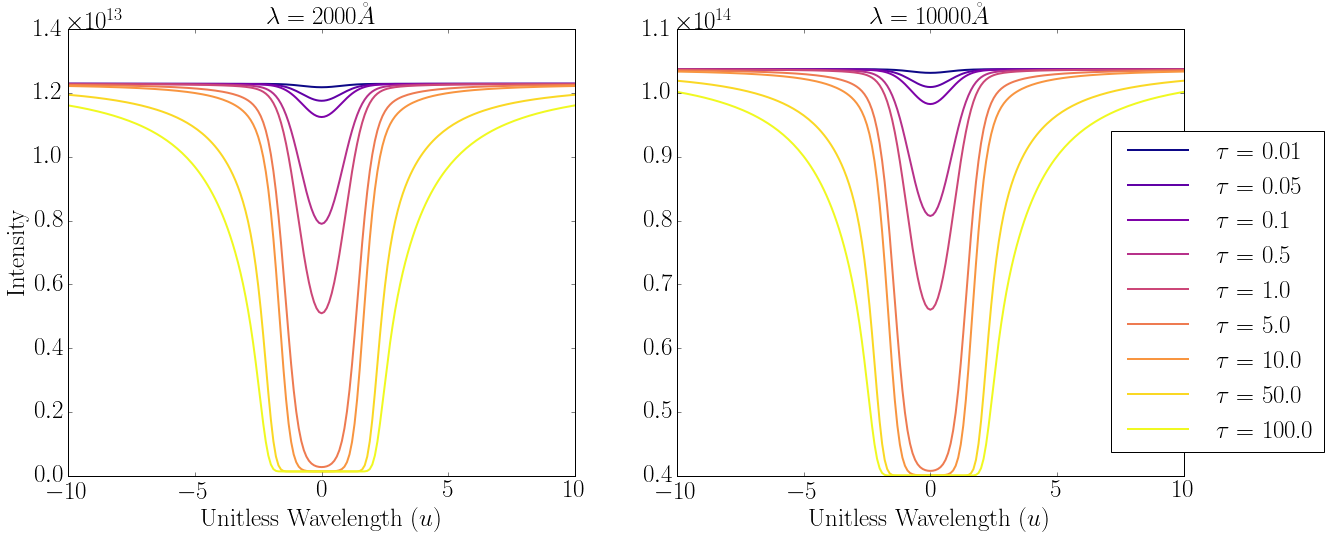

In [37]:
Ts=5700                 # solar surface temperature
Tl=4200                 # solar T-min temperature = ‘reversing layer’
a=0.1                   # damping parameter
wav1=2000e-8            # wavelength in cm
wav2=10000e-8           # wavelength in cm
# optical depth at line center:
tau0=np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100])
colors1,smap,cNorm = scalarmap(np.log10(tau0)) # Define colors
u=np.linspace(-10.,10.,201)   # u = -10 to 10 in 0.1 steps
I=np.zeros_like(u)            # declare array

# Setup plot
fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(1,2) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
# Loop over tau
for j in range(len(tau0)):
    # Loop over wavelength 
    for i in range(len(u)):
        tau=tau0[j] * voigt(a,abs(u[i]))
        I[i]=planck(Ts,wav1) * np.exp(-tau) + planck(Tl,wav1)*(1.-np.exp(-tau))
    ax0.plot(u,I,c=colors[j], lw=2.0, label=r'$\tau =$ '+str(tau0[j])) 
for j in range(len(tau0)):
    # Loop over wavelength 
    for i in range(len(u)):
        tau=tau0[j] * voigt(a,abs(u[i]))
        I[i]=planck(Ts,wav2) * np.exp(-tau) + planck(Tl,wav2)*(1.-np.exp(-tau))
    ax1.plot(u,I,c=colors[j], lw=2.0, label=r'$\tau =$ '+str(tau0[j]))      
ax1.legend(bbox_to_anchor=(1.3,0.8))
ax0.set_xlabel(r"Unitless Wavelength ($u$)")
ax1.set_xlabel(r"Unitless Wavelength ($u$)")
ax0.set_ylabel(r"Intensity")
ax0.set_title(r"$\lambda = 2000 \AA$")
ax1.set_title(r"$\lambda = 10000 \AA$")
plt.show()

**What sets the top value $I_{cont}$ and the limit value reached at line center by $I(0)$? Check these values by computing them directly on the command line. What happens to these values at other wavelengths?**  

> $I_{cont}$ is set by the blackbody intensity of the hot surface layer at the given wavelength. The line center intensity is set by the blackbody intensity of the cooler reversing layer. The below calculations agree. At intermediate wavelengths the intensity is partitioned between the two blackbody intensities depending on the optical depth. 

In [38]:
print "B( T=",Ts,',lam=',wav1,') =',planck(Ts,wav1)/1e13,"x 1e13"
print "B( T=",Tl,',lam=',wav1,') =',planck(Tl,wav1)/1e13,"x 1e13"
print "B( T=",Ts,',lam=',wav2,') =',planck(Ts,wav2)/1e14,"x 1e14"
print "B( T=",Tl,',lam=',wav2,') =',planck(Tl,wav2)/1e14,"x 1e14"

B( T= 5700 ,lam= 2e-05 ) = 1.22941922918 x 1e13
B( T= 4200 ,lam= 2e-05 ) = 0.0135569691906 x 1e13
B( T= 5700 ,lam= 0.0001 ) = 1.03753161681 x 1e14
B( T= 4200 ,lam= 0.0001 ) = 0.400482959595 x 1e14


**Observed spectra that are measured in detector counts without absolute intensity calibration are usually scaled to the local continuum intensity by plotting $I_{\lambda} / I_{cont}$ against wavelength. Do that for the above profiles at the same three wavelengths:**

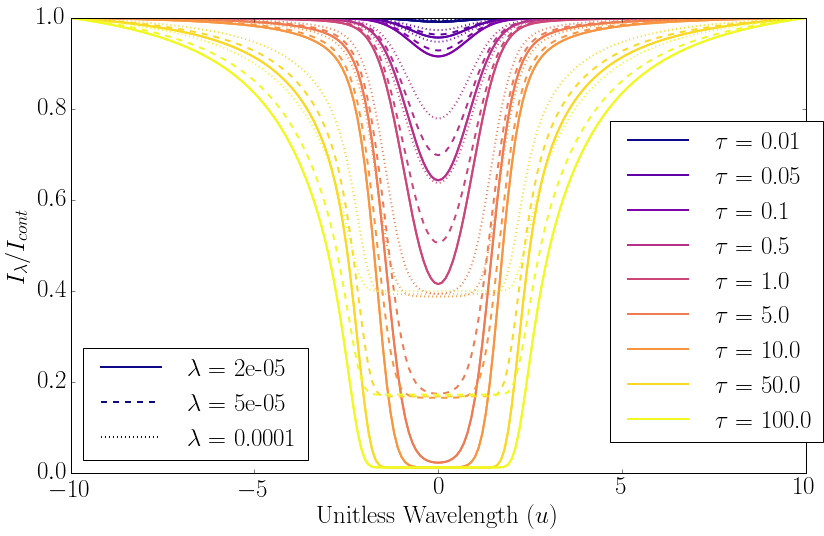

In [40]:
wav=np.array([2000.,5000.,10000.]) * 1e-8       # wavelength in cm
linesty = ["-","--",":"]

# Create Figure
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
leg1,leg2 = [],[]
# Loop over line center wavelength
for iw in range(len(wav)):
    # Loop over tau
    for j in range(len(tau0)):
        # Loop over wavelength 
        for i in range(len(u)):
            tau=tau0[j] * voigt(a,np.abs(u[i]))
            I[i]=planck(Ts,wav[iw]) * np.exp(-tau) + planck(Tl,wav[iw])*(1.-np.exp(-tau))
        I=I/I[0]       # convert into relative intensity      
        if (iw == 0):
            line = ax0.plot(u,I,c=colors[j], lw=2.0, label=r'$\tau =$ '+str(tau0[j]), ls=linesty[iw])
            leg1.append(line)
        if (j==0):
            line = ax0.plot(u,I,c=colors[j], lw=2.0, label=r'$\lambda =$ '+str(wav[iw]), ls=linesty[iw])
            leg2.append(line)
        ax0.plot(u,I,c=colors[j], lw=2.0, ls=linesty[iw])
leg1 = [lg[0] for lg in leg1]
leg2 = [lg[0] for lg in leg2]
l1 = ax0.legend(handles=leg1,bbox_to_anchor=(1.04,0.8))
axl = plt.gca().add_artist(l1)
l2 = ax0.legend(handles=leg2, loc=3)
ax0.set_xlabel(r"Unitless Wavelength ($u$)")
ax0.set_ylabel(r"$I_{\lambda} / I_{cont}$")
fig.tight_layout(); plt.show()

**Explain the wavelength dependencies in this plot.**  

> Longer wavelength lines saturate their cores at higher intensities and for smaller optical depths. As we increase the wavelngth of line center to longer wavelengths, the line moves up the Rayleigh-Jeans blackbody slope (of the cool layer) to greater intensities. This explains why the line saturates at higher intensities for longer wavelengths.  

# 3.4 The equivalent width of spectral lines  

The profile plots demonstrate that the growth of the absorption feature in the spectrum for increasing $\tau(0)$ is faster for small $\tau(0)$ then when it "saturates" for larger $\tau(0)$. Minnaert and coworkers introduced the equivalent width $W_{\lambda}$ as a line-strength parameter to measure this growth quantitively. It measures the integrated line depression in the normalized spectrum:  

$$ W_{\lambda} \equiv \int \frac{I_{cont} - I(\lambda)}{I_{cont}} d \lambda $$  

so that its value is the same as the width of a rectangular piece of spectrum that blocks the same amount of spectrum completely. We will express it here in the dimensionless wavelength units $u$.  

**In order to add such profile integration it becomes handy to turn the profile computation into a function ``profile(a,tau0,u)``:**

In [86]:
def profile(a,tau0,u, Ts=5700, Tl=4200, wav=5000e-8):
    # return a Schuster-Schwarzschild profile
    # input: a = damping parameter
    #     tau0 = SS layer thickness at line center
    #     u = wavelength array in Doppler units
    # output: int = intensity array
    I=np.zeros_like(u)
    usize=len(u)
    for i in range(usize):
        tau=tau0 * voigt(a,np.abs(u[i]))
        I[i]=planck(Ts,wav)*np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
    return I

**Check your routine:**

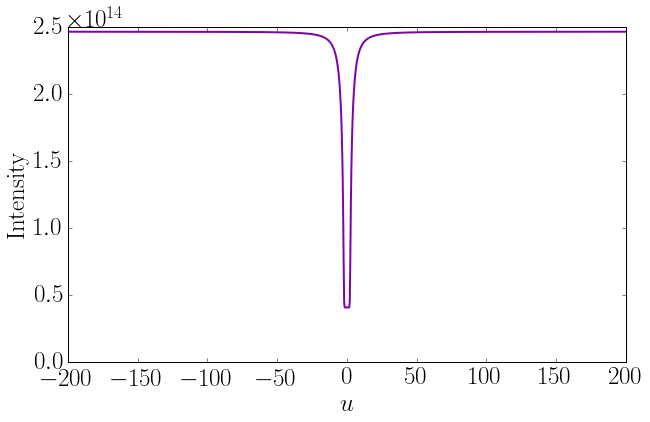

In [76]:
# u = -200 to +200 in steps of 0.4
u=np.linspace(-200,200,1001) 
a=0.1
tau0=1e2
I=profile(a,tau0,u)
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(u,I, lw=2.0, color=colors[2])
ax0.set_xlabel("$u$"); ax0.set_ylabel('Intensity')
plt.show()

**Continue by computing the equivalent width with by summing line depth in relative units**

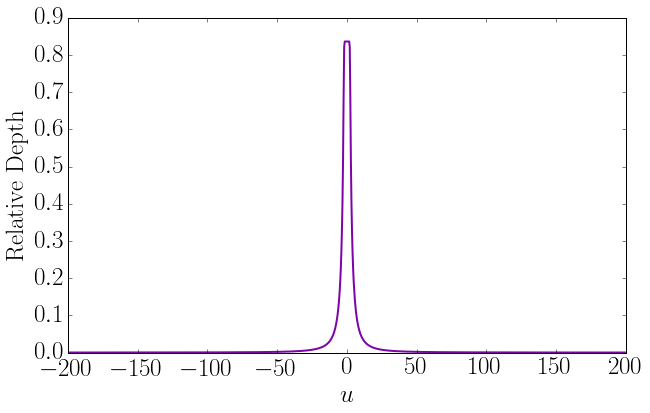

Equivalent Width: 7.53677551602


In [77]:
reldepth=(I[0]-I)/I[0]
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(u,reldepth, lw=2.0, color=colors[2])
ax0.set_xlabel("$u$"); ax0.set_ylabel('Relative Depth')
plt.show()
eqw=np.sum(reldepth)*0.4
print "Equivalent Width:",eqw

# 3.5 The curve of growth  

The profile plots illustrate that the profile growth is only linear with $\tau (0)$ for $\tau (0) << 1$. The "curve of growth" describes the full dependence: the growth of the line strength with the line-causing particle density.  

**Compute and plot a curve of growth by plotting $\log W_{\lambda}$ against $\log \tau(0)$:**  

In [78]:
tau0=10.**(np.linspace(-2,4,61))  # 10**-2 to 10**4, 0.1 steps in the log
eqw=np.zeros_like(tau0)           # same size array
for i in range(len(tau0)):
    I=profile(a,tau0[i],u)
    reldepth=(I[0]-I)/I[0]
    eqw[i]=np.sum(reldepth)*0.4

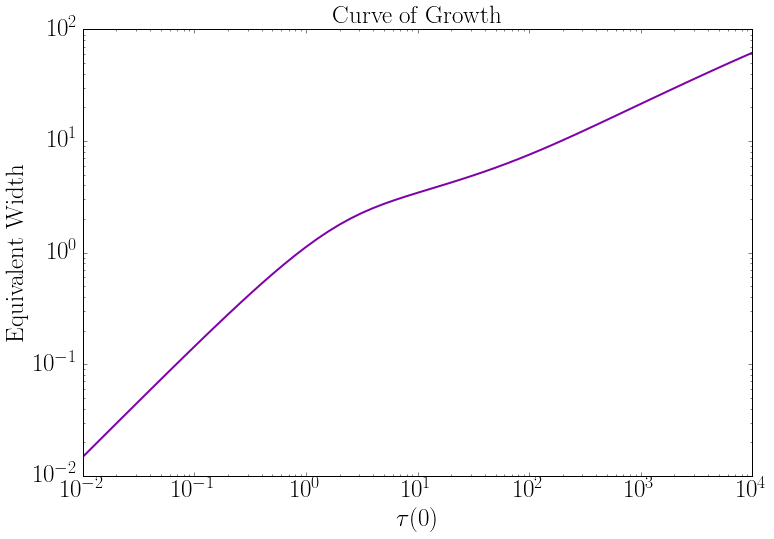

In [79]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(tau0,eqw, lw=2.0, color=colors[2]); ax0.set_title("Curve of Growth")
ax0.set_xlabel(r'$\tau(0)$'); ax0.set_ylabel('Equivalent Width')
ax0.loglog(); plt.show()

**Explain what happens in the three different parts.**  

>In the optically thin limit the equivalent width grows linearly as the core of the line deepens. In the central portion ($\tau(0) \sim 1$) the equivalent width grows logarithmically with optical depth as the Gaussian core still dominates the Voigt profile, but the core has saturated. In the optically thick limit the equivalent width grows as the square root of the optical depth as collisions begin to overwhelm the Doppler wings and they begin to deepen.   

**The first part has slope 1:1, the third part has slope 1:2 in this log-log plot. Why?**  

>Lines in log-log plots are power law relations. In the first part, the equivalent width grows linearly with optical depth becuase the Gaussian core is deepening. In the third part where the slope is $1/2$, the equivalent width is growing as the square root of the optical depth becuase the wings are deepening, albeit less rapidly with optical depth than the core grew. 

**Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with Figure 14 in Rutten.**  

>The location ($\tau(0)$) of the onset of the square root portion is controlled by the damping parameter ($a$). By inspection it looks like $\tau(0)_{\text{onset}} \approx 1/a$. Then from Figure 14 in Rutten the onset of the square root region for FeI occurs at $\log \chi_f \approx 0.5$, or $\tau(0) \approx 3$. This corresponds to a damping parameter of $a_{\text{FeI}} \approx 0.3$. 

**Final question: of which parameter should you raise the numerical value in order to produce emission lines instead of absorption lines? Change it accordingly and re-run your programs to produce emission profiles and an emission-line curve of growth. Avoid plotting negative $W_{\lambda}$ values logarithmically by plotting the absolute value of the equivalent width.**  

>Emission lines will be produced instead of absorption lines if the **temperature** of the upper layer in the atmosphere is *higher* than the "surface" layer. Here, I'll change the temperature of the upper layer to $6500$ K. 

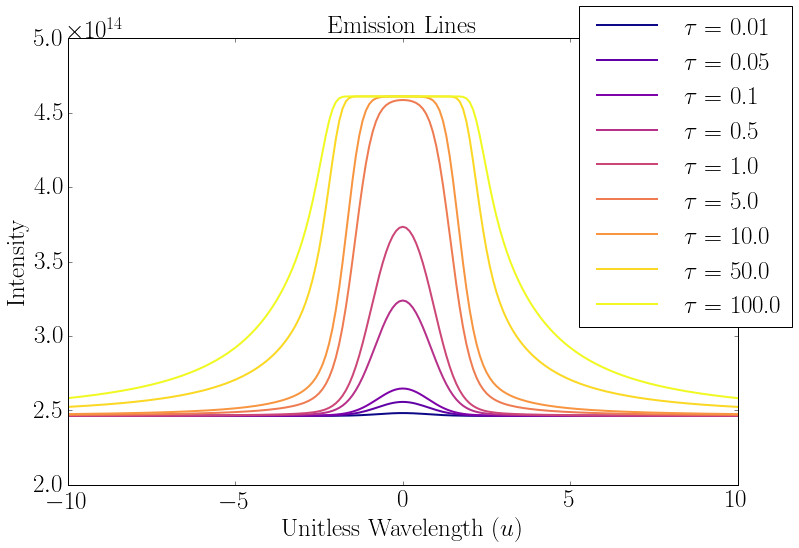

In [91]:
# Emission lines:
Ts=5700                 # solar surface temperature
Tl=6500                 # New solar upper layer temperature
a=0.1                   # damping parameter
wav=5000e-8             # wavelength in cm
# optical depth at line center:
tau0=np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100])
colors,smap,cNorm = scalarmap(np.log10(tau0)) # Define colors
u=np.linspace(-10.,10.,201)   # u = -10 to 10 in 0.1 steps
I=np.zeros_like(u)            # declare array

# Create Figure
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
# Loop over tau
for j in range(len(tau0)):
    # Loop over wavelength 
    for i in range(len(u)):
        tau=tau0[j] * voigt(a,abs(u[i]))
        I[i]=planck(Ts,wav) * np.exp(-tau) + planck(Tl,wav)*(1.-np.exp(-tau))
    ax0.plot(u,I,c=colors[j], lw=2.0, label=r'$\tau =$ '+str(tau0[j]))      
ax0.legend(bbox_to_anchor=(1.1,1.1))
ax0.set_xlabel(r"Unitless Wavelength ($u$)")
ax0.set_ylabel(r"Intensity")
ax0.set_title("Emission Lines")
plt.show()

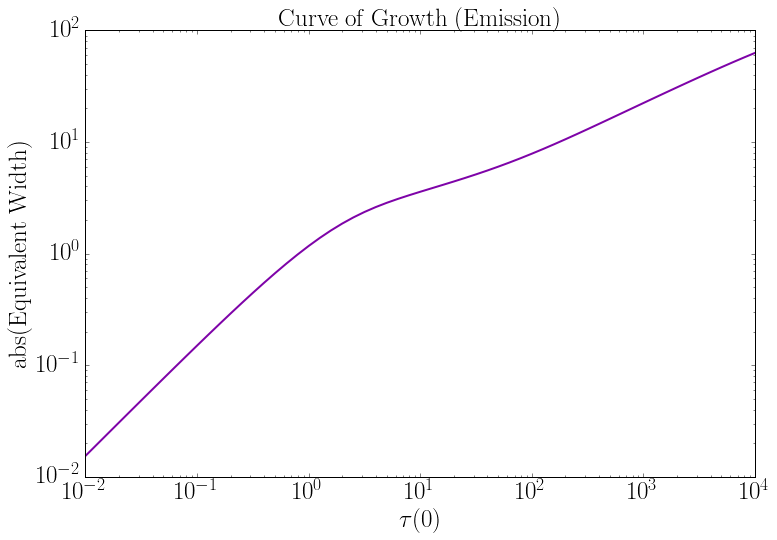

In [94]:
# Emission line curve of growth
u=np.linspace(-200,200,1001) 
a=0.1
tau0=1e2
I=profile(a,tau0,u, Tl=6500.)

reldepth=(I[0]-I)/I[0]
eqw=np.sum(reldepth)*0.4

tau0=10.**(np.linspace(-2,4,61))  # 10**-2 to 10**4, 0.1 steps in the log
eqw=np.zeros_like(tau0)           # same size array
for i in range(len(tau0)):
    I=profile(a,tau0[i],u, Tl=6500.)
    reldepth=(I[0]-I)/I[0]
    eqw[i]=np.sum(reldepth)*0.4
    
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(tau0,np.abs(eqw), lw=2.0, color=colors[2]); ax0.set_title("Curve of Growth (Emission)")
ax0.set_xlabel(r'$\tau(0)$'); ax0.set_ylabel('abs(Equivalent Width)')
ax0.loglog(); plt.show()

>The emission-line curve of growth is identical (but negative) to the absorption-line curve of growth becuase they are both governed by the same physical relations.